# Projeto do Curso de Python para Análise de Dados
## Projeto 04 - Case Mercado de Games

In [4]:
# Libs para Modelagem e Matrizez
import numpy as np
import pandas as pd

# Libs para análises gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Lib para ignorar avisos
import warnings

# Desabilitando avisos
warnings.filterwarnings('ignore')

### Análise Exploratória e Limpeza

In [5]:
dados = pd.read_csv('PS4_GamesSales.csv', encoding='latin-1')

dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [6]:
dados.shape

(1034, 9)

In [7]:
dados.isnull().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

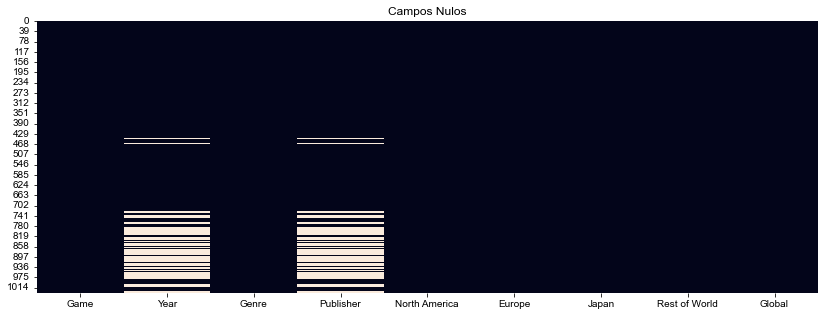

In [8]:
plt.figure( figsize=(14,5))
plt.title('Campos Nulos')

sns.set_style('white')
sns.heatmap(dados.isnull(),cbar=False)

plt.show()

In [9]:
# Retirando as linhas com dados vazios
dados.dropna(inplace=True)
dados.shape

(825, 9)

In [10]:
dados.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2015.966061,0.256448,0.311600,0.042048,0.111552,0.721721
std,1.298360,0.620259,0.868271,0.119814,0.274713,1.743122
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2016.000000,0.050000,0.020000,0.000000,0.020000,0.120000
75%,2017.000000,0.190000,0.220000,0.040000,0.090000,0.560000
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


### Distribuição Geral de Vendas por Ano

In [11]:
# Apagando os anos de 2019 e 2020
dados = dados.loc[(dados['Year']!= 2019) & (dados['Year']!= 2020)]
dados.Year.unique()

array([2014., 2015., 2018., 2017., 2016., 2013.])

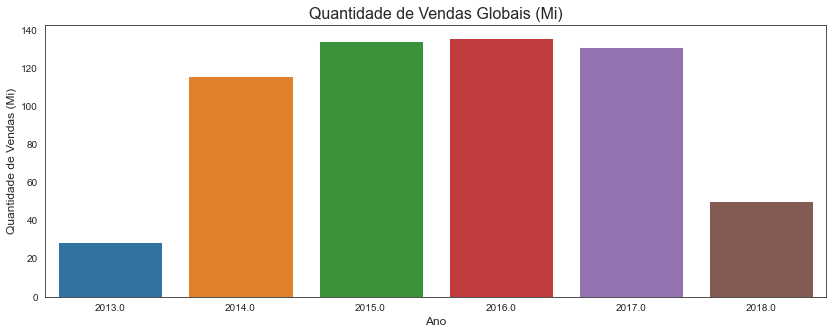

In [12]:
plt.figure( figsize=(14,5))
plt.title('Quantidade de Vendas Globais (Mi)',fontsize = 16)

sns.barplot(data = dados, x = 'Year', y = 'Global',ci = None, estimator=sum)

plt.ylabel('Quantidade de Vendas (Mi)',fontsize = 12)
plt.xlabel('Ano',fontsize = 12)
plt.show()

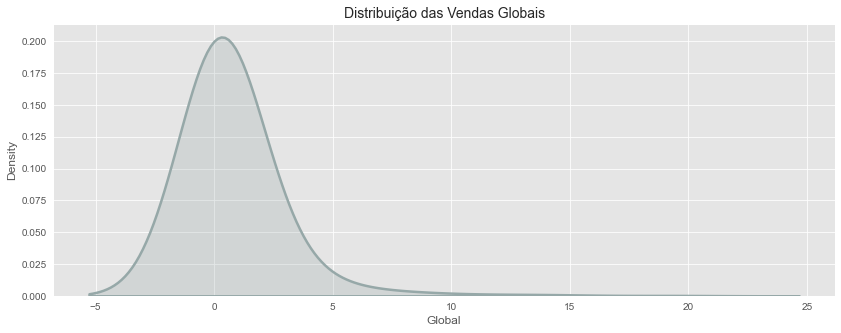

In [13]:
plt.figure(figsize=(14,5))

plt.style.use('ggplot')

sns.kdeplot(dados['Global'],shade = True, bw = 1, color = '#96a8a8',linewidth = 2.5)

plt.title('Distribuição das Vendas Globais',fontsize = 14)

plt.show()

In [14]:
dados.groupby(by=['Year']).sum().reset_index()

,Year,North America,Europe,Japan,Rest of World,Global
0,2013.0,10.35,12.88,0.97,4.57,28.76
1,2014.0,39.80,54.12,3.58,18.29,115.85
2,2015.0,49.60,56.21,7.28,20.88,133.99
3,2016.0,47.40,57.98,9.65,20.71,135.72
4,2017.0,44.77,57.18,9.08,19.89,130.90
5,2018.0,19.65,18.70,4.13,7.69,50.20


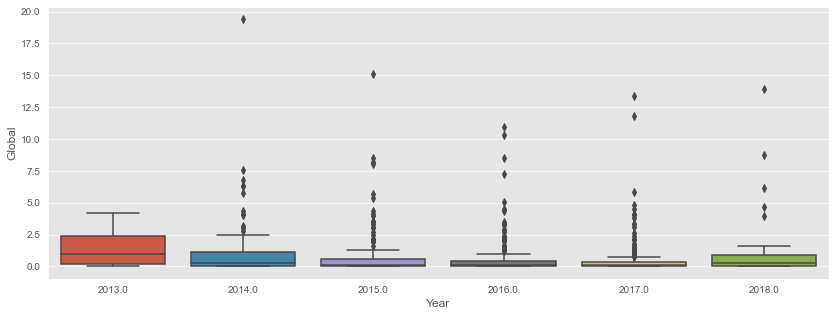

In [15]:
plt.figure(figsize = (14,5))
sns.boxplot(data = dados, x = 'Year', y = 'Global' )

plt.show()

In [16]:
# filtrando apenas o jogos que tiveram vendas acima de 10 milhões
dados.loc[dados['Global'] >= 10]

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33


### Proporção de Consumo por Região

In [17]:
analise = dados.groupby(by = ['Year']).sum().reset_index()
analise

,Year,North America,Europe,Japan,Rest of World,Global
0,2013.0,10.35,12.88,0.97,4.57,28.76
1,2014.0,39.80,54.12,3.58,18.29,115.85
2,2015.0,49.60,56.21,7.28,20.88,133.99
3,2016.0,47.40,57.98,9.65,20.71,135.72
4,2017.0,44.77,57.18,9.08,19.89,130.90
5,2018.0,19.65,18.70,4.13,7.69,50.20


In [18]:
# analisando a proporção dos 100% de cada continemente comparado ao Total

America = [America/Total * 100 for America, Total in zip(analise['North America'],analise['Global'])]
Europa = [Europa/Total * 100 for Europa, Total in zip(analise['Europe'],analise['Global'])]
Japao = [Japan/Total * 100 for Japan, Total in zip(analise['Japan'],analise['Global'])]
Mundo = [Mundo/Total * 100 for Mundo, Total in zip(analise['Rest of World'],analise['Global'])]



America,Europa,Japao,Mundo

([35.9874826147427,
  34.35476909797151,
  37.01768788715576,
  34.92484526967286,
  34.20168067226891,
  39.14342629482071],
 [44.78442280945759,
  46.71558049201555,
  41.95089185760131,
  42.72030651340996,
  43.68220015278838,
  37.25099601593625],
 [3.372739916550765,
  3.0902028485110056,
  5.433241286663184,
  7.110226937813145,
  6.936592818945759,
  8.227091633466136],
 [15.890125173852576,
  15.78765645230902,
  15.58325248152847,
  15.259357500736812,
  15.194805194805195,
  15.31872509960159])

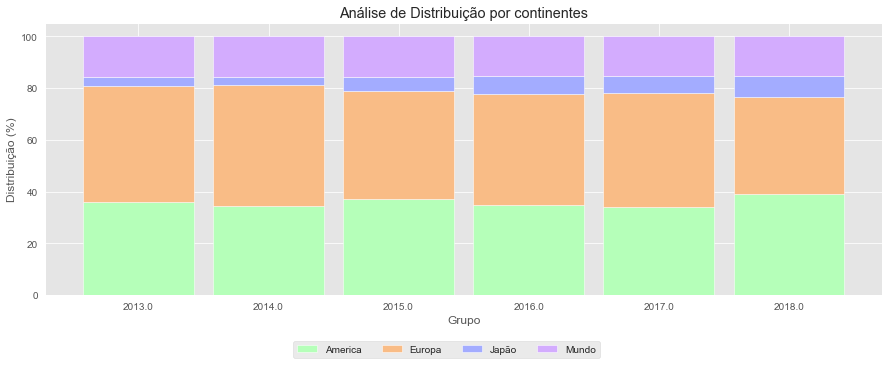

In [19]:
plt.figure(figsize=(15,5))

# largura da barra no gráfico, rótulos e grupos
largura_barra = 0.85
Rotulos = analise['Year']
Grupos = [0,1,2,3,4,5]

plt.title('Análise de Distribuição por continentes')

#America
plt.bar(Grupos,America, width=largura_barra, color='#b5ffb9', edgecolor = 'white')

# Europa
plt.bar(Grupos,Europa,bottom=America,width=largura_barra,color='#f9bc86',edgecolor = 'white')

# Japao
plt.bar(Grupos,Japao,bottom=[A + B for A,B in zip(America,Europa)],width= largura_barra, color='#a3acff',edgecolor = 'white')

# Mundo
plt.bar(Grupos,Mundo,bottom=[A + B + C for A,B,C in zip(America,Europa,Japao)],width= largura_barra, color='#d3acfe',edgecolor = 'white')

# Labels
plt.xticks(Grupos,Rotulos) # substitui os grupos por rotulos
plt.xlabel('Grupo')
plt.ylabel('Distribuição (%)')

#Legenda
plt.legend(['America','Europa','Japão','Mundo'],loc = 'upper left',bbox_to_anchor=(0.29,-0.15),ncol=4)

plt.show()

In [20]:
dados.Publisher.unique()

array(['Rockstar Games', 'Activision', 'EA Sports', 'Electronic Arts',
       'Sony Interactive Entertainment', 'Bethesda Softworks',
       'Sony Computer Entertainment', 'Namco Bandai Games', 'Square Enix',
       'Capcom', 'Blizzard Entertainment', 'Ubisoft',
       'Warner Bros. Interactive', '2K Sports',
       'Warner Bros. Interactive Entertainment',
       'Konami Digital Entertainment', '2K Games', 'Hello Games',
       '505 Games', 'Deep Silver', 'Take-Two Interactive',
       'Bandai Namco Games', 'Sega', 'Tecmo Koei', 'Gearbox Software',
       'Mojang', 'Disney Interactive Studios', 'Focus Home Interactive',
       'Studio Wildcard', 'Codemasters', 'Koch Media',
       'Harmonix Music Systems', 'Rebellion Developments', 'Gun Media',
       'Telltale Games', 'Kalypso Media', 'City Interactive',
       'NIS America', 'Sold Out', 'Tripwire Interactive', 'PQube',
       'THQ Nordic', 'Milestone S.r.l.', 'Nordic Games', 'Astragon',
       'Koei Tecmo', 'Frontier Developments', 

In [21]:
# Convertendo dados de valoris qualitativos para quantitativos
from sklearn.preprocessing import LabelEncoder
funcao_label = LabelEncoder()

dados['Produtor'] = funcao_label.fit_transform(dados['Publisher'])
dados['Genero'] = funcao_label.fit_transform(dados['Genre'])
dados['Jogo'] = funcao_label.fit_transform(dados['Game'])

dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Produtor,Genero,Jogo
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,107,0,273
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,12,98
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,107,1,521
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8,12,102
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,40,14,222


In [22]:
# Criando uma paleta de Cores em lista
Paleta_cores = sns.color_palette('husl',8)
Paleta_cores

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8087954113106306, 0.5634700050056693, 0.19502642696727285),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.19783576093349015, 0.6955516966063037, 0.3995301037444499),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.22335772267769388, 0.6565792317435265, 0.8171355503265633),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.9603888539940703, 0.3814317878772117, 0.8683117650835491)]

### Análise por Produtor

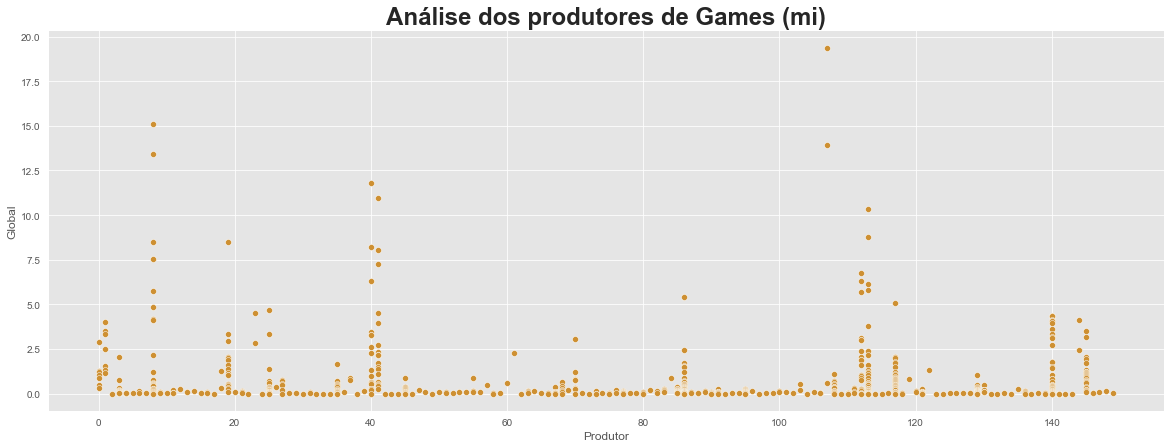

In [23]:
plt.figure(figsize=(20,7))
plt.title('Análise dos produtores de Games (mi)', weight="bold", size=24)
sns.scatterplot(data=dados, x='Produtor',y='Global',color = Paleta_cores[1])

plt.show()

In [24]:
#dados.loc[dados['Global'] >= 10]
maiores_produtores = dados.groupby(by=['Publisher']).sum().reset_index()
maiores_produtores = maiores_produtores.loc[maiores_produtores['Global']>=5].reset_index()
maiores_produtores = maiores_produtores.sort_values(by=['Global'],ascending = False)
maiores_produtores

,index,Publisher,Year,North America,Europe,Japan,Rest of World,Global,Produtor,Genero,Jogo
2,8,Activision,60453.0,28.20,30.96,1.65,11.71,72.44,240,207,10870
17,140,Ubisoft,88679.0,18.50,29.46,1.91,9.22,59.16,6160,224,17885
8,41,Electronic Arts,40308.0,17.05,27.88,1.42,8.60,54.96,820,214,7422
14,113,Sony Interactive Entertainment,88738.0,21.07,22.96,2.14,8.73,54.85,4972,258,19749
7,40,EA Sports,38290.0,15.18,24.36,0.40,7.60,47.55,760,266,6367
13,112,Sony Computer Entertainment,48351.0,15.95,17.96,1.64,6.72,42.26,2688,150,10681
11,107,Rockstar Games,6049.0,11.50,16.24,0.81,5.38,33.93,321,3,1131
15,117,Square Enix,74587.0,9.60,10.36,5.95,3.97,29.92,4329,234,13245
3,19,Bethesda Softworks,34272.0,9.82,13.83,0.71,4.56,28.96,323,125,8526
19,145,Warner Bros. Interactive Entertainment,52409.0,10.16,12.88,0.30,4.52,27.83,3770,41,9751


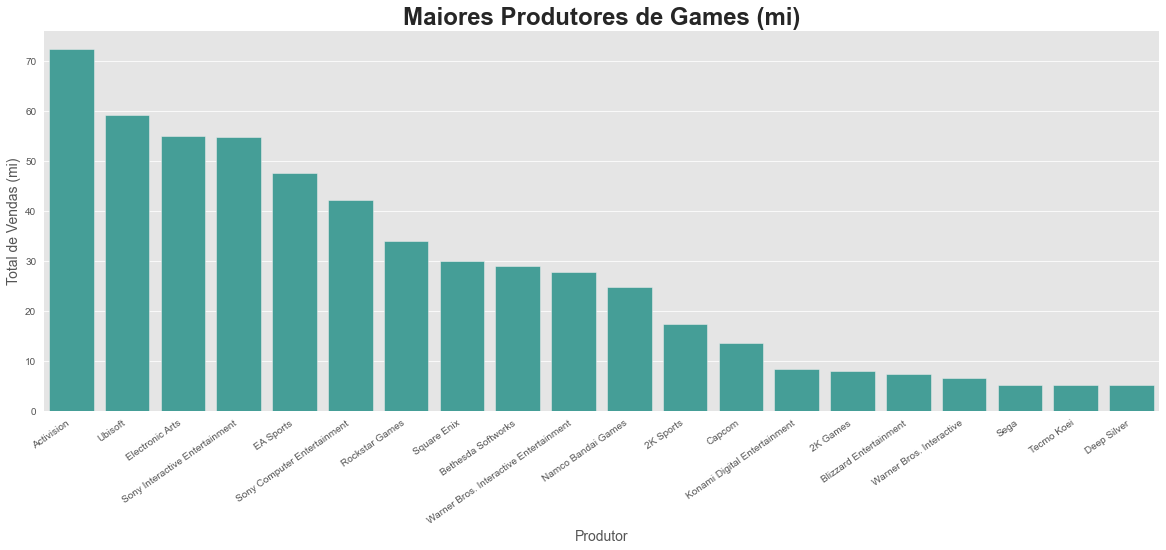

In [25]:
plt.figure(figsize=(20,7))
plt.title('Maiores Produtores de Games (mi)', weight="bold", size=24)

sns.barplot(data=maiores_produtores, x='Publisher',y='Global',color = Paleta_cores[4])

plt.xlabel('Produtor',size = 14)
plt.ylabel('Total de Vendas (mi)',size = 14)
plt.xticks ( rotation = 35 , ha = 'right')
plt.show()

In [26]:
# analisando a proporção dos 100% de cada continemente comparado ao Total

analise = maiores_produtores


America = [America/Total * 100 for America, Total in zip(analise['North America'],analise['Global'])]
Europa = [Europa/Total * 100 for Europa, Total in zip(analise['Europe'],analise['Global'])]
Japao = [Japan/Total * 100 for Japan, Total in zip(analise['Japan'],analise['Global'])]
Mundo = [Mundo/Total * 100 for Mundo, Total in zip(analise['Rest of World'],analise['Global'])]



America,Europa,Japao,Mundo

([38.92876863611264,
  31.2711291413117,
  31.02256186317322,
  38.41385597082954,
  31.924290220820183,
  37.74254614292475,
  33.89330975537872,
  32.085561497326196,
  33.908839779005525,
  36.507366151634926,
  32.68998793727383,
  58.87096774193549,
  31.53219837157661,
  23.480333730631703,
  36.48816936488169,
  36.277173913043484,
  43.140243902439025,
  28.27324478178368,
  29.601518026565472,
  37.02290076335878],
 [42.73881833241304,
  49.79716024340771,
  50.727802037845706,
  41.85961713764813,
  51.23028391167191,
  42.4988168480833,
  47.86324786324787,
  34.62566844919785,
  47.75552486187845,
  46.2809917355372,
  36.71089666264575,
  22.811059907834103,
  30.273871206513693,
  43.6233611442193,
  45.08094645080946,
  44.56521739130436,
  36.89024390243902,
  30.36053130929791,
  24.857685009487668,
  32.63358778625954],
 [2.2777471010491444,
  3.228532792427316,
  2.583697234352256,
  3.9015496809480403,
  0.8412197686645636,
  3.8807382867960247,
  2.3872679045092835

### Análise por Gênero

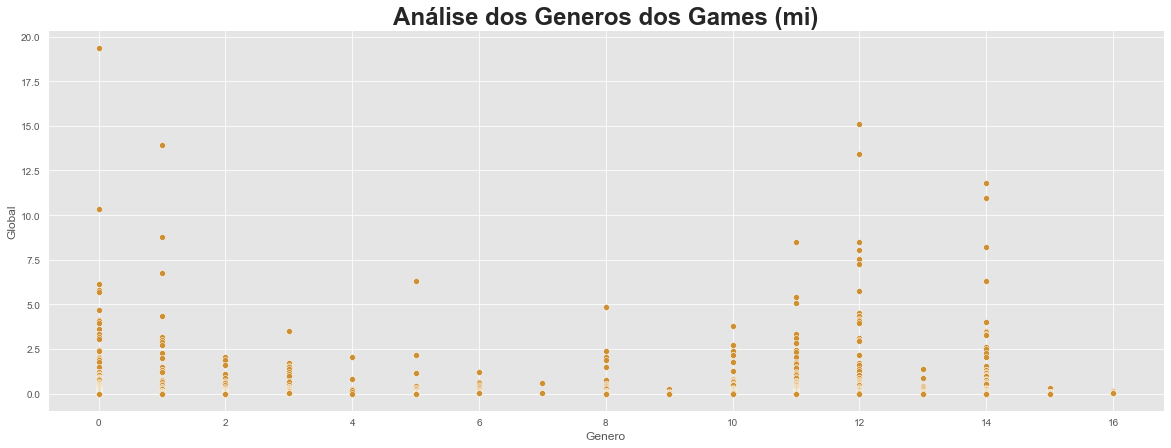

In [27]:
plt.figure(figsize=(20,7))
plt.title('Análise dos Generos dos Games (mi)', weight="bold", size=24)
sns.scatterplot(data=dados, x='Genero',y='Global',color = Paleta_cores[1])

plt.show()

In [28]:
#dados.loc[dados['Global'] >= 10]
generos_mais_vendidos = dados.groupby(by=['Genre']).sum().reset_index()
generos_mais_vendidos = generos_mais_vendidos.sort_values(by=['Global'],ascending = False)
generos_mais_vendidos

,Genre,Year,North America,Europe,Japan,Rest of World,Global,Produtor,Genero,Jogo
0,Action,407224.0,48.15,57.51,10.27,20.76,136.82,17704,0,75592
12,Shooter,145135.0,50.50,58.64,4.42,21.48,134.99,3771,864,28147
14,Sports,139070.0,33.31,42.81,1.83,14.90,92.85,3999,966,29100
11,Role-Playing,207657.0,22.15,22.40,9.33,8.91,62.73,8637,1133,39660
1,Action-Adventure,74580.0,22.30,27.79,1.96,9.83,61.86,3187,37,15991
10,Racing,94761.0,5.86,14.77,0.76,3.81,25.29,3429,470,19612
3,Fighting,64506.0,8.58,6.11,1.67,2.97,19.36,2645,96,12311
8,Platform,64506.0,5.48,8.92,0.67,2.77,17.85,2565,256,15126
2,Adventure,141128.0,5.27,6.08,1.64,2.23,15.22,5498,140,30656
5,Misc,100754.0,3.64,6.03,0.96,1.85,12.47,4801,250,19662


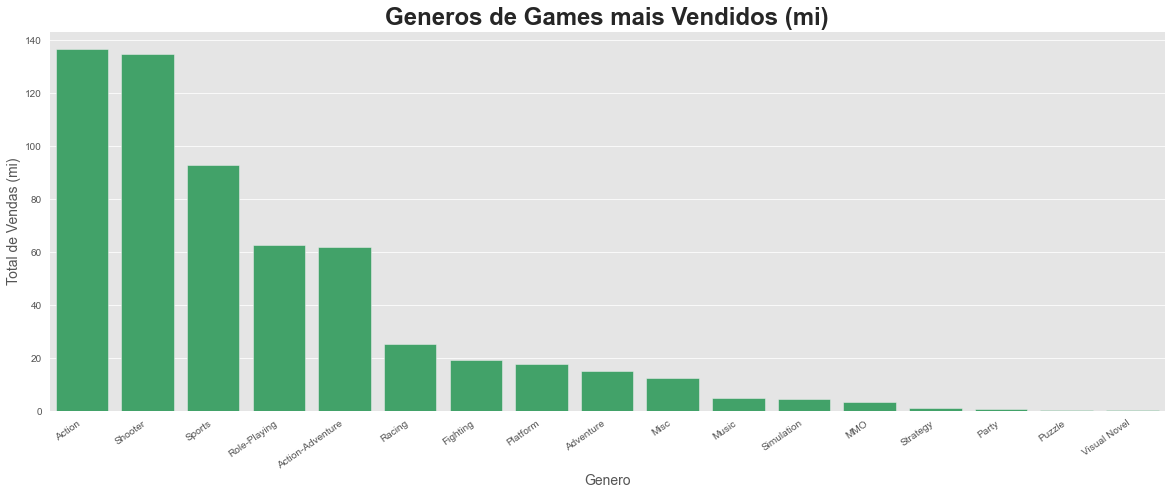

In [29]:
plt.figure(figsize=(20,7))
plt.title('Generos de Games mais Vendidos (mi)', weight="bold", size=24)

sns.barplot(data=generos_mais_vendidos, x='Genre',y='Global',color = Paleta_cores[3])

plt.xlabel('Genero',size = 14)
plt.ylabel('Total de Vendas (mi)',size = 14)
plt.xticks ( rotation = 35 , ha = 'right')
plt.show()

### Análise por Jogos

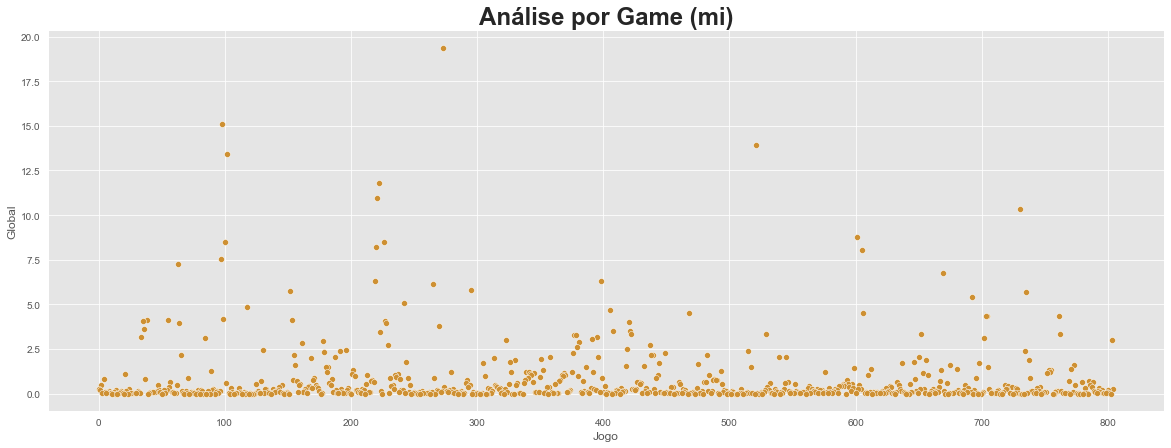

In [30]:
plt.figure(figsize=(20,7))
plt.title('Análise por Game (mi)', weight="bold", size=24)
sns.scatterplot(data=dados, x='Jogo',y='Global',color = Paleta_cores[1])

plt.show()

In [31]:
dados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Produtor,Genero,Jogo
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,107,0,273
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,12,98
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,107,1,521
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8,12,102
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,40,14,222


#### Jogos mais vendidos

In [32]:
ranking_geral_10_mais = dados.sort_values(by='Global',ascending=False)
ranking_geral_10_mais = ranking_geral_10_mais[0:10]
ranking_geral_10_mais

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Produtor,Genero,Jogo
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,107,0,273
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,12,98
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,107,1,521
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8,12,102
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,40,14,222
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94,41,14,221
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33,113,0,730
7,Spider-Man (PS4),2018.0,Action-Adventure,Sony Interactive Entertainment,3.64,3.39,0.32,1.41,8.76,113,1,601
8,Call of Duty: Infinite Warfare,2016.0,Shooter,Activision,3.11,3.83,0.19,1.36,8.48,8,12,100
9,Fallout 4,2015.0,Role-Playing,Bethesda Softworks,2.91,3.97,0.27,1.34,8.48,19,11,226


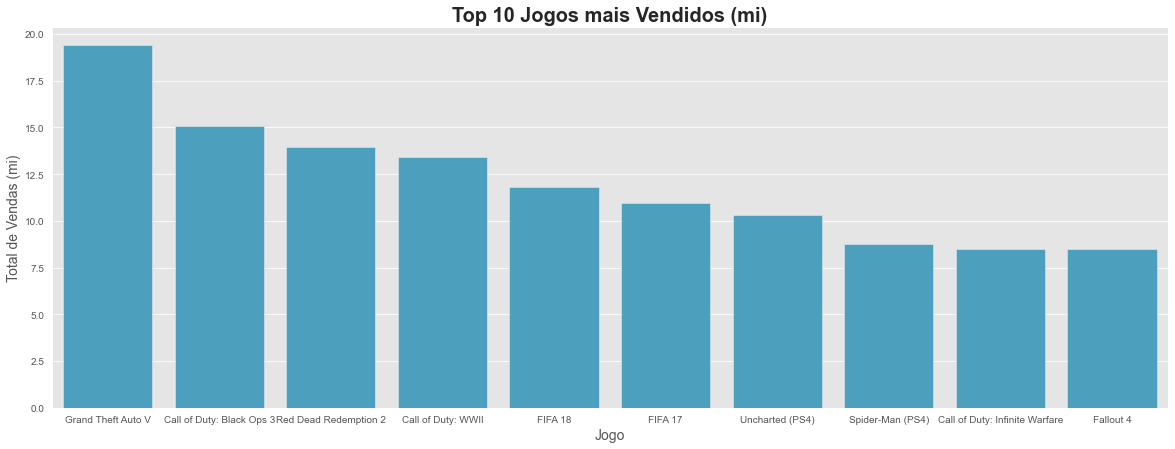

In [33]:
plt.figure(figsize=(20,7))
plt.title('Top 10 Jogos mais Vendidos (mi)', weight="bold", size=20)

sns.barplot(data=ranking_geral_10_mais, x='Game',y='Global',color = Paleta_cores[5])

plt.xlabel('Jogo',size = 14)
plt.ylabel('Total de Vendas (mi)',size = 14)
#plt.xticks ( rotation = 35 , ha = 'right')
plt.show()

#### Jogos mais vendido por Regiões
#### North America

In [34]:
NA_10_mais = dados.sort_values(by=['North America'],ascending=False)
NA_10_mais = NA_10_mais[0:10]
NA_10_mais

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Produtor,Genero,Jogo
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,12,98
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,107,0,273
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,107,1,521
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8,12,102
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33,113,0,730
7,Spider-Man (PS4),2018.0,Action-Adventure,Sony Interactive Entertainment,3.64,3.39,0.32,1.41,8.76,113,1,601
11,Star Wars Battlefront 2015,2015.0,Shooter,Electronic Arts,3.31,3.19,0.23,1.30,8.03,41,12,605
8,Call of Duty: Infinite Warfare,2016.0,Shooter,Activision,3.11,3.83,0.19,1.36,8.48,8,12,100
9,Fallout 4,2015.0,Role-Playing,Bethesda Softworks,2.91,3.97,0.27,1.34,8.48,19,11,226
12,Call of Duty: Advanced Warfare,2014.0,Shooter,Activision,2.84,3.34,0.14,1.22,7.53,8,12,97


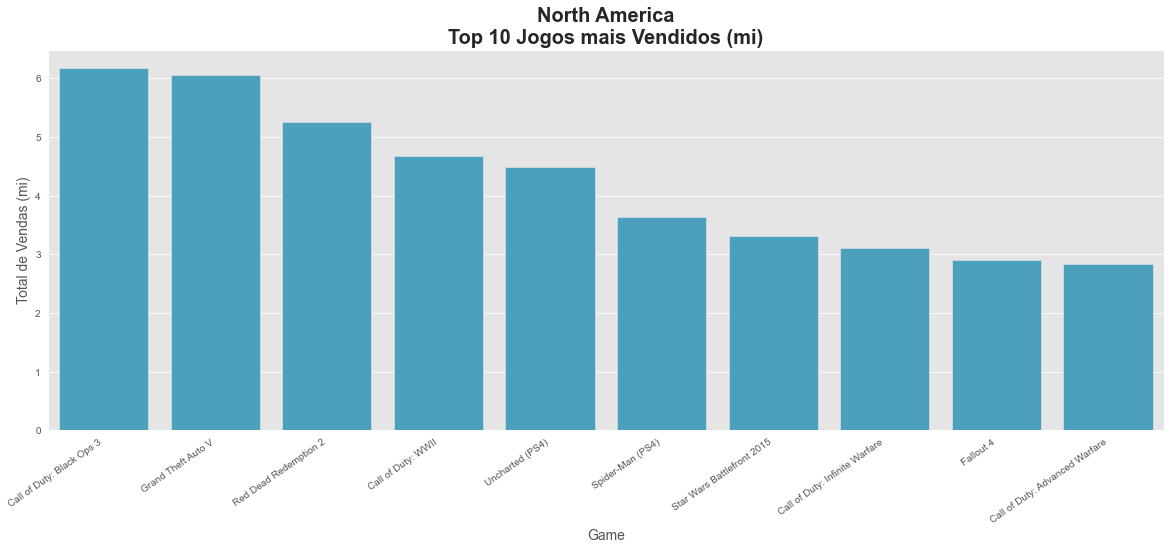

In [35]:
plt.figure(figsize=(20,7))
plt.title('North America\nTop 10 Jogos mais Vendidos (mi)', weight="bold", size=20)

sns.barplot(data=NA_10_mais, x='Game',y='North America',color = Paleta_cores[5])

plt.xlabel('Game',size = 14)
plt.ylabel('Total de Vendas (mi)',size = 14)
plt.xticks ( rotation = 35 , ha = 'right')
plt.show()

#### Jogos mais vendido por Regiões
#### Europe

In [36]:
EU_10_mais = dados.sort_values(by=['Europe'],ascending=False)
EU_10_mais = EU_10_mais[0:10]
EU_10_mais

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Produtor,Genero,Jogo
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,107,0,273
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,40,14,222
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94,41,14,221
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,107,1,521
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8,12,102
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,12,98
10,FIFA 16,2015.0,Sports,EA Sports,1.15,5.77,0.07,1.23,8.22,40,14,220
16,FIFA 15,2014.0,Sports,EA Sports,0.83,4.49,0.05,0.94,6.32,40,14,219
9,Fallout 4,2015.0,Role-Playing,Bethesda Softworks,2.91,3.97,0.27,1.34,8.48,19,11,226
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33,113,0,730


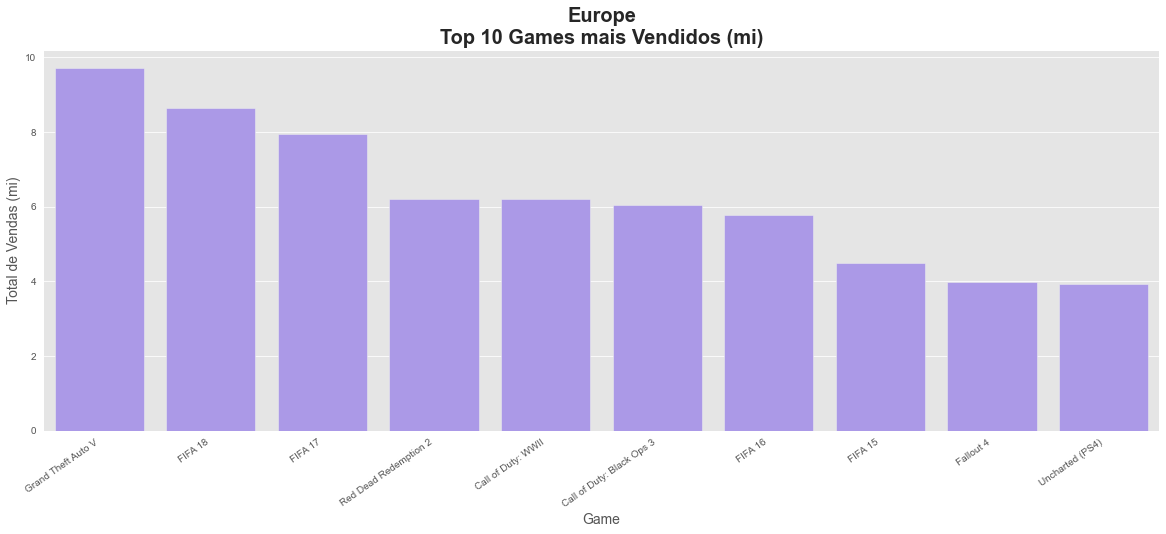

In [37]:
plt.figure(figsize=(20,7))
plt.title('Europe\nTop 10 Games mais Vendidos (mi)', weight="bold", size=20)

sns.barplot(data=EU_10_mais, x='Game',y='Europe',color = Paleta_cores[6])

plt.xlabel('Game',size = 14)
plt.ylabel('Total de Vendas (mi)',size = 14)
plt.xticks ( rotation = 35 , ha = 'right')
plt.show()

#### Jogos mais vendido por Regiões
#### Japan

In [38]:
JP_10_mais = dados.sort_values(by=['Japan'],ascending=False)
JP_10_mais = JP_10_mais[0:10]
JP_10_mais

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Produtor,Genero,Jogo
24,Monster Hunter: World,2018.0,Action,Capcom,1.03,1.06,2.17,0.42,4.67,25,0,405
81,Dragon Quest XI,2017.0,Role-Playing,Square Enix,0.29,0.22,1.43,0.10,2.04,117,11,187
22,Final Fantasy XV,2016.0,Role-Playing,Square Enix,1.81,1.53,1.05,0.68,5.07,117,11,242
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,107,0,273
54,Metal Gear Solid V: The Phantom Pain,2015.0,Action,Konami Digital Entertainment,0.97,1.15,0.50,0.42,3.04,70,0,391
96,Persona 5,2016.0,Role-Playing,Deep Silver,0.62,0.34,0.48,0.20,1.64,35,11,475
65,Dark Souls III,2016.0,Role-Playing,Namco Bandai Games,1.00,0.63,0.44,0.34,2.42,86,11,130
87,Knack,2013.0,Platform,Sony Computer Entertainment,0.45,0.77,0.42,0.23,1.88,112,8,330
94,NieR Automata,2017.0,Role-Playing,Square Enix,0.56,0.51,0.42,0.22,1.71,117,11,444
47,Resident Evil VII: Biohazard,2017.0,Action,Capcom,0.88,1.56,0.41,0.46,3.31,25,0,529


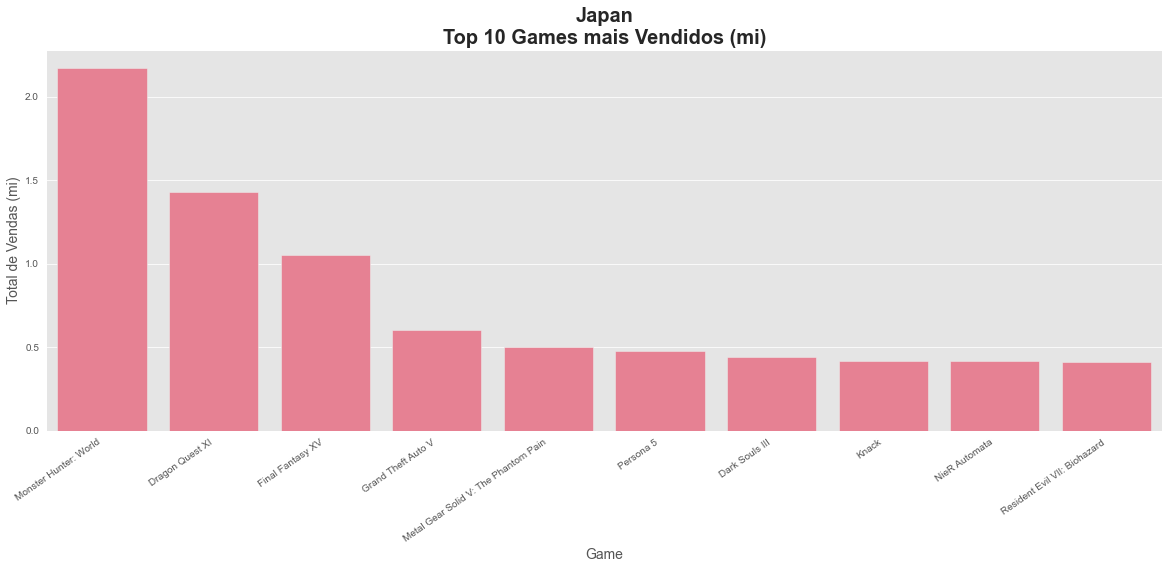

In [39]:
plt.figure(figsize=(20,7))
plt.title('Japan\nTop 10 Games mais Vendidos (mi)', weight="bold", size=20)

sns.barplot(data=JP_10_mais, x='Game',y='Japan',color = Paleta_cores[0])

plt.xlabel('Game',size = 14)
plt.ylabel('Total de Vendas (mi)',size = 14)
plt.xticks ( rotation = 35 , ha = 'right')
plt.show()

In [40]:
#### Jogos mais vendido por Regiões
#### Rest of the World

In [41]:
RW_10_mais = dados.sort_values(by=['Rest of World'],ascending=False)
RW_10_mais = RW_10_mais[0:10]
RW_10_mais

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Produtor,Genero,Jogo
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,107,0,273
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,12,98
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,107,1,521
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8,12,102
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,40,14,222
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33,113,0,730
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94,41,14,221
7,Spider-Man (PS4),2018.0,Action-Adventure,Sony Interactive Entertainment,3.64,3.39,0.32,1.41,8.76,113,1,601
8,Call of Duty: Infinite Warfare,2016.0,Shooter,Activision,3.11,3.83,0.19,1.36,8.48,8,12,100
9,Fallout 4,2015.0,Role-Playing,Bethesda Softworks,2.91,3.97,0.27,1.34,8.48,19,11,226


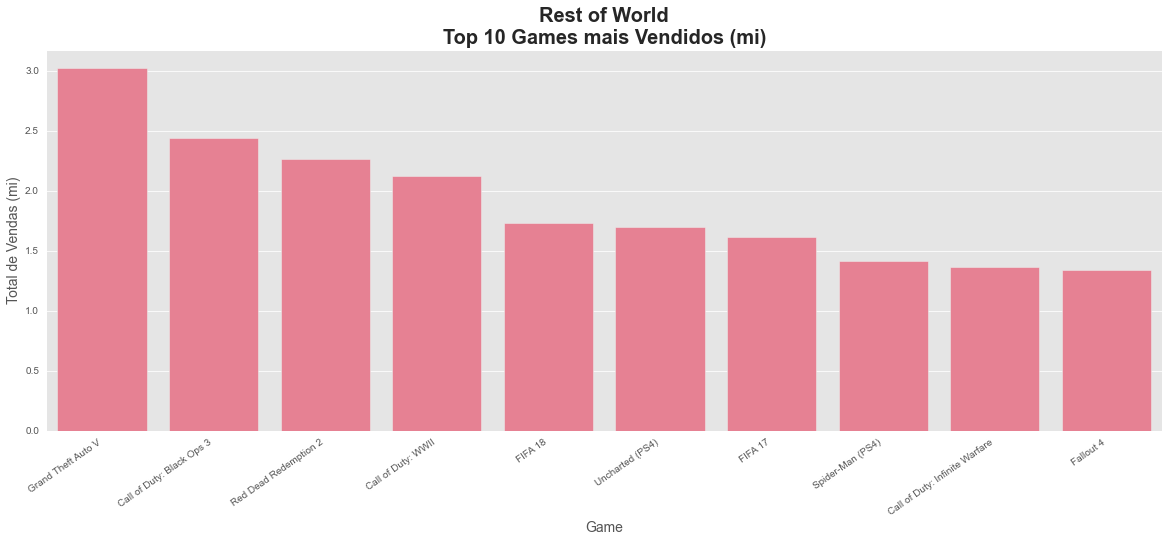

In [42]:
plt.figure(figsize=(20,7))
plt.title('Rest of World\nTop 10 Games mais Vendidos (mi)', weight="bold", size=20)

sns.barplot(data=RW_10_mais, x='Game',y='Rest of World',color = Paleta_cores[0])

plt.xlabel('Game',size = 14)
plt.ylabel('Total de Vendas (mi)',size = 14)
plt.xticks ( rotation = 35 , ha = 'right')
plt.show()

- Em Resumo, é possível reparar que o consumo de jogos entre as regiões é bastante diferente.

- Na Europa podemos ver um consumo maior de jogos de Futebol como os Fifas, enquanto no NA os jogos Call of Duty e GTA V se destacam mais.

- Já no Japão, jogos como Monster Hunter e Dragon Quest Lideram o ranking.

- No restante do mundo, o GTA V e o Call of Duty 3 se destacam.

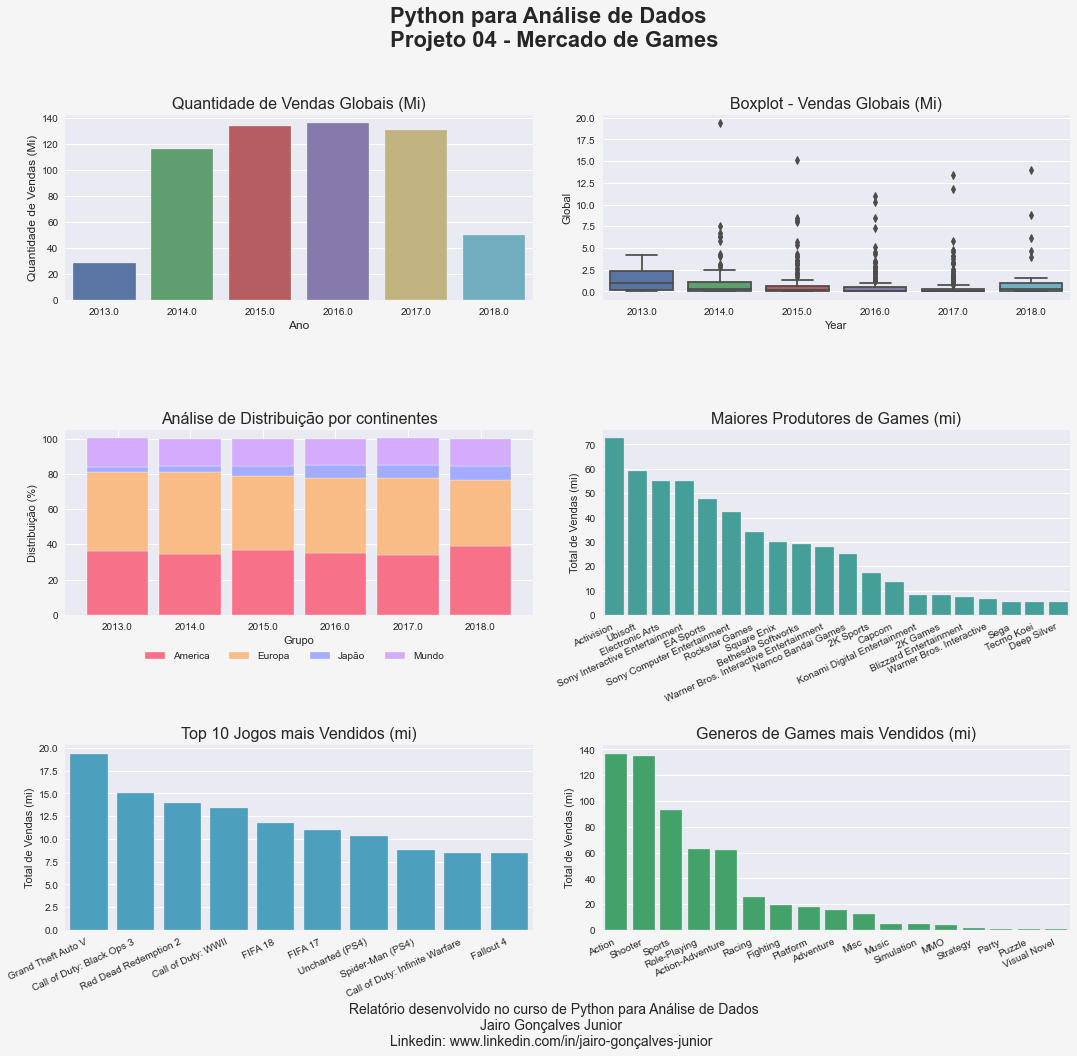

In [87]:
## Relatório Master

# Tamanho da imagem
fig,ax = plt.subplots(figsize = (18,15))

# Parametros para o grid de gráficos
colunas =3
linhas = 2

# Cor de Fundo
cor_fundo = '#f5f5f5'
ax.set_facecolor( cor_fundo)
fig.set_facecolor(cor_fundo)

# Estilo dos gráficos
plt.style.use('seaborn')

# Título do Report
plt.suptitle('Python para Análise de Dados \n Projeto 04 - Mercado de Games',fontsize = 22,fontweight =600 )


# Acessandro o Gráfico 1
plt.subplot(colunas,linhas,1)

plt.title('Quantidade de Vendas Globais (Mi)',fontsize = 16)

sns.barplot(data = dados, x = 'Year', y = 'Global',ci = None, estimator=sum)

plt.ylabel('Quantidade de Vendas (Mi)',fontsize = 12)
plt.xlabel('Ano',fontsize = 12)

# Acessandro o Gráfico 2
plt.subplot(colunas,linhas,2)
plt.title('Boxplot - Vendas Globais (Mi)',fontsize = 16)
sns.boxplot(data = dados, x = 'Year', y = 'Global' )

# Acessandro o Gráfico 3
plt.subplot(colunas,linhas,3)

analise = dados.groupby(by = ['Year']).sum().reset_index()
analise
America = [America/Total * 100 for America, Total in zip(analise['North America'],analise['Global'])]
Europa = [Europa/Total * 100 for Europa, Total in zip(analise['Europe'],analise['Global'])]
Japao = [Japan/Total * 100 for Japan, Total in zip(analise['Japan'],analise['Global'])]
Mundo = [Mundo/Total * 100 for Mundo, Total in zip(analise['Rest of World'],analise['Global'])]

largura_barra = 0.85
Rotulos = analise['Year']
Grupos = [0,1,2,3,4,5]

plt.title('Análise de Distribuição por continentes',fontsize = 16)

#America
plt.bar(Grupos,America, width=largura_barra, color=Paleta_cores[0], edgecolor = 'white')

# Europa
plt.bar(Grupos,Europa,bottom=America,width=largura_barra,color='#f9bc86',edgecolor = 'white')

# Japao
plt.bar(Grupos,Japao,bottom=[A + B for A,B in zip(America,Europa)],width= largura_barra, color='#a3acff',edgecolor = 'white')

# Mundo
plt.bar(Grupos,Mundo,bottom=[A + B + C for A,B,C in zip(America,Europa,Japao)],width= largura_barra, color='#d3acfe',edgecolor = 'white')

# Labels
plt.xticks(Grupos,Rotulos) # substitui os grupos por rotulos
plt.xlabel('Grupo')
plt.ylabel('Distribuição (%)')

#Legenda
plt.legend(['America','Europa','Japão','Mundo'],loc = 'upper left',bbox_to_anchor=(0.15,-0.15),ncol=4)


# Acessandro o Gráfico 4
plt.subplot(colunas,linhas,4)

maiores_produtores = dados.groupby(by=['Publisher']).sum().reset_index()
maiores_produtores = maiores_produtores.loc[maiores_produtores['Global']>=5].reset_index()
maiores_produtores = maiores_produtores.sort_values(by=['Global'],ascending = False)

plt.title('Maiores Produtores de Games (mi)',fontsize = 16)

sns.barplot(data=maiores_produtores, x='Publisher',y='Global',color = Paleta_cores[4])

plt.xlabel('')
plt.ylabel('Total de Vendas (mi)')
plt.xticks ( rotation = 25 , ha = 'right')


# Acessandro o Gráfico 5
plt.subplot(colunas,linhas,5)

ranking_geral_10_mais = dados.sort_values(by='Global',ascending=False)
ranking_geral_10_mais = ranking_geral_10_mais[0:10]

plt.title('Top 10 Jogos mais Vendidos (mi)', size=16)

sns.barplot(data=ranking_geral_10_mais, x='Game',y='Global',color = Paleta_cores[5])

plt.xlabel('')
plt.ylabel('Total de Vendas (mi)')
plt.xticks ( rotation = 25 , ha = 'right')


# Acessandro o Gráfico 6
plt.subplot(colunas,linhas,6)

generos_mais_vendidos = dados.groupby(by=['Genre']).sum().reset_index()
generos_mais_vendidos = generos_mais_vendidos.sort_values(by=['Global'],ascending = False)
#generos_mais_vendidos = generos_mais_vendidos[0:10]
plt.title('Generos de Games mais Vendidos (mi)',size=16)

sns.barplot(data=generos_mais_vendidos, x='Genre',y='Global',color = Paleta_cores[3])

plt.xlabel('')
plt.ylabel('Total de Vendas (mi)')
plt.xticks ( rotation = 25 , ha = 'right')


# Definindo a distância dos gráficos
plt.subplots_adjust(hspace = 0.7,wspace = 0.15)

# Rodapé
Rodape = ''' Relatório desenvolvido no curso de Python para Análise de Dados
Jairo Gonçalves Junior
Linkedin: www.linkedin.com/in/jairo-gonçalves-junior'''

fig.text(0.5,0.015,Rodape,ha='center', va = 'bottom', size = 14)

plt.show()